#### Information about samples: the data I am using in this example is published and can be find here: https://zenodo.org/records/6578617
#### the paper: https://www.nature.com/articles/s41586-022-05060-x
##### CK158 - control P1 (healthy heart zone)
##### CK159 - RZ/BZ P5 (remote / border heart zone)
##### CK361 - IZ P 10 (ischaemic heart zone)

In [1]:
import scanpy as sc
import scanpy.external as sce
import pandas as pd

In [7]:
adata = sc.read_h5ad('/Users/danomics/Desktop/Scanpy_analysis/Harmony/filtered_data/concat_filtered_3_samples.h5ad')
adata

/Users/danomics/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 26193 × 13157
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'batch', 'condition'
    layers: 'raw_counts'

# Without Harmony

In [4]:
# run normalization and dimensionality reduction 

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, subset=False)
sc.pp.scale(adata)
sc.pp.pca(adata, use_highly_variable=True)
sc.pp.neighbors(adata, use_rep = "X_pca")
sc.tl.umap(adata)

/Users/danomics/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:377: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)
/Users/danomics/miniconda3/envs/scanpy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


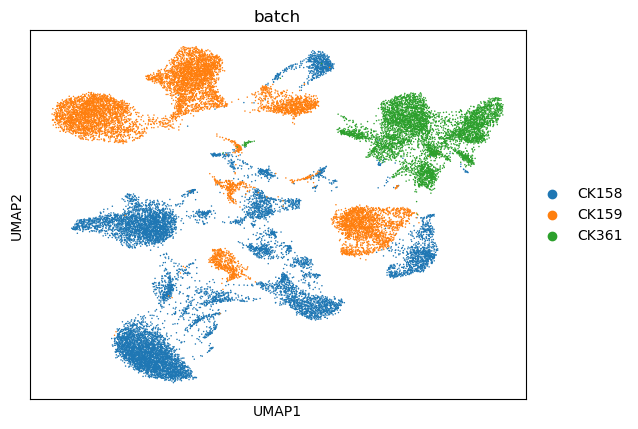

In [5]:
sc.pl.umap(adata, color = 'batch')

# With Harmony

In [8]:
# run normalization and dimensionality reduction 

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, batch_key = 'batch', subset=False)
sc.pp.scale(adata)
sc.pp.pca(adata, use_highly_variable=True)


/Users/danomics/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:377: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


In [15]:
adata.obs['batch'].unique()

['CK158', 'CK159', 'CK361']
Categories (3, object): ['CK158', 'CK159', 'CK361']

In [16]:
adata.obs

,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,outlier,mt_outlier,doublet_score,predicted_doublet,batch,condition
AAACCCACAAAGGAGA-1,1679,1667,7.419381,2587.0,7.858641,14.418245,3.0,1.386294,0.115964,False,False,0.010155,False,CK158,control
AAACCCACAGAGATGC-1,4190,4170,8.335911,12986.0,9.471704,31.018019,7.0,2.079442,0.053904,False,False,0.145194,False,CK158,control
AAACCCACATCGGATT-1,7048,6993,8.852808,25756.0,10.156462,22.666563,43.0,3.784190,0.166951,False,False,0.267951,False,CK158,control
AAACCCAGTAACGGTG-1,2702,2692,7.898411,6357.0,8.757469,28.346704,3.0,1.386294,0.047192,False,False,0.034132,False,CK158,control
AAACCCAGTCCAGAAG-1,519,515,6.246107,623.0,6.436151,18.780096,0.0,0.000000,0.000000,False,False,0.012754,False,CK158,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCCCATGGG-1,780,762,6.637258,925.0,6.830874,13.729730,1.0,0.693147,0.108108,False,False,0.355932,False,CK361,ischaemic zone
TTTGGTTTCCGAAGGA-1,562,554,6.318968,657.0,6.489205,13.242009,0.0,0.000000,0.000000,False,False,0.142857,False,CK361,ischaemic zone
TTTGTTGTCCAATGCA-1,748,730,6.594413,901.0,6.804615,11.431743,1.0,0.693147,0.110988,False,False,0.074842,False,CK361,ischaemic zone
TTTGTTGTCGTGTTCC-1,711,700,6.552508,840.0,6.734591,11.904762,1.0,0.693147,0.119048,False,False,0.071553,False,CK361,ischaemic zone


In [10]:
# run batch effect correction or also known as integration 
# pip install harmonypy has to be installed for this step

sce.pp.harmony_integrate(adata, key = 'batch')

2025-05-13 19:35:15,152 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-05-13 19:35:17,088 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-05-13 19:35:17,157 - harmonypy - INFO - Iteration 1 of 10
2025-05-13 19:35:20,912 - harmonypy - INFO - Iteration 2 of 10
2025-05-13 19:35:24,844 - harmonypy - INFO - Iteration 3 of 10
2025-05-13 19:35:28,755 - harmonypy - INFO - Iteration 4 of 10
2025-05-13 19:35:32,713 - harmonypy - INFO - Iteration 5 of 10
2025-05-13 19:35:34,888 - harmonypy - INFO - Iteration 6 of 10
2025-05-13 19:35:36,582 - harmonypy - INFO - Iteration 7 of 10
2025-05-13 19:35:38,477 - harmonypy - INFO - Iteration 8 of 10
2025-05-13 19:35:40,067 - harmonypy - INFO - Iteration 9 of 10
2025-05-13 19:35:41,846 - harmonypy - INFO - Iteration 10 of 10
2025-05-13 19:35:43,555 - harmonypy - INFO - Stopped before convergence


In [11]:
sc.pp.neighbors(adata, use_rep = "X_pca_harmony") # use new embedding

In [12]:
sc.tl.umap(adata)

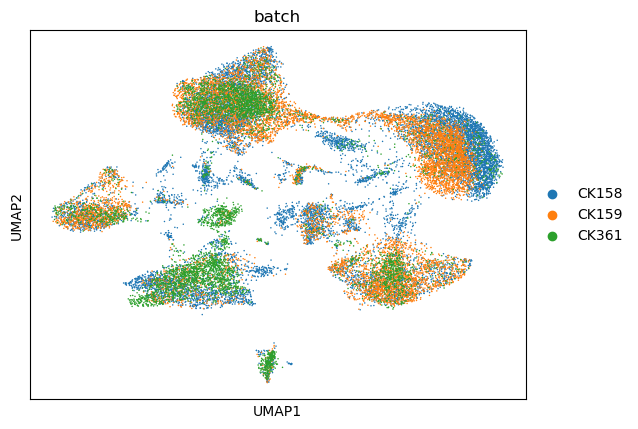

In [13]:
# visualize the results of the integration using UMAP 
sc.pl.umap(adata, color = 'batch')